#Visualização dos dados


## Imports bibliotecas

In [1]:
!pip install -q gdown

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

In [3]:
# Visualização das Colunas
pd.set_option('display.max_columns', None)

Baixando os dataframes

In [4]:
# Baixando as notas convertidas para um gabarito único
# https://drive.google.com/file/d/1-fBdv1c4EZ986l3IwP3jwwPW8T6rywJF/view?usp=sharing
gdown.download(f"https://drive.google.com/uc?id=1-fBdv1c4EZ986l3IwP3jwwPW8T6rywJF", "/content/df_Rank.parquet", quiet=False)
df_Rank_cp = pd.read_parquet("/content/df_Rank.parquet")



Downloading...
From: https://drive.google.com/uc?id=1-fBdv1c4EZ986l3IwP3jwwPW8T6rywJF
To: /content/df_Rank.parquet
100%|██████████| 41.8k/41.8k [00:00<00:00, 8.35MB/s]


In [5]:
# https://drive.google.com/file/d/1-fBdv1c4EZ986l3IwP3jwwPW8T6rywJF/view?usp=sharing

In [6]:
df_Rank = df_Rank_cp.copy()

In [7]:
df_Rank

,ID_QUESTAO,Alternativa_1,Alternativa_2,Alternativa_3,Alternativa_4,Alternativa_5,Letra_Alternativa_1,Questao_Mais_Assinalada_Era_Correta,Contagem Alternativa Certa
0,2019001,14153.0,3280.0,2879.0,1897.0,573.0,B,1.0,14153.0
1,2019002,12047.0,5113.0,4561.0,549.0,502.0,D,1.0,12047.0
2,2019003,15530.0,4089.0,1786.0,799.0,553.0,A,1.0,15530.0
3,2019004,16773.0,2656.0,1890.0,939.0,524.0,B,1.0,16773.0
4,2019005,12122.0,4007.0,3671.0,1832.0,1128.0,E,1.0,12122.0
...,...,...,...,...,...,...,...,...,...
920,2023181,15500.0,8308.0,7329.0,5669.0,3563.0,E,1.0,15500.0
921,2023182,14995.0,8284.0,6202.0,5709.0,5164.0,A,1.0,14995.0
922,2023183,15134.0,10120.0,7424.0,4325.0,3351.0,C,0.0,10120.0
923,2023184,23099.0,5124.0,4616.0,4114.0,3422.0,C,1.0,23099.0


In [ ]:
# Somar todas as linhas de uma coluna específica
soma = df_Rank['Questao_Mais_Assinalada_Era_Correta'].sum()
acertos = soma / df_Rank.shape[0] *100
acertos = np.round(acertos,2)
print(f"{acertos}% das vezes a alternativa mais assinalada era a correta")

61.08% das vezes a alternativa mais assinalada era a correta


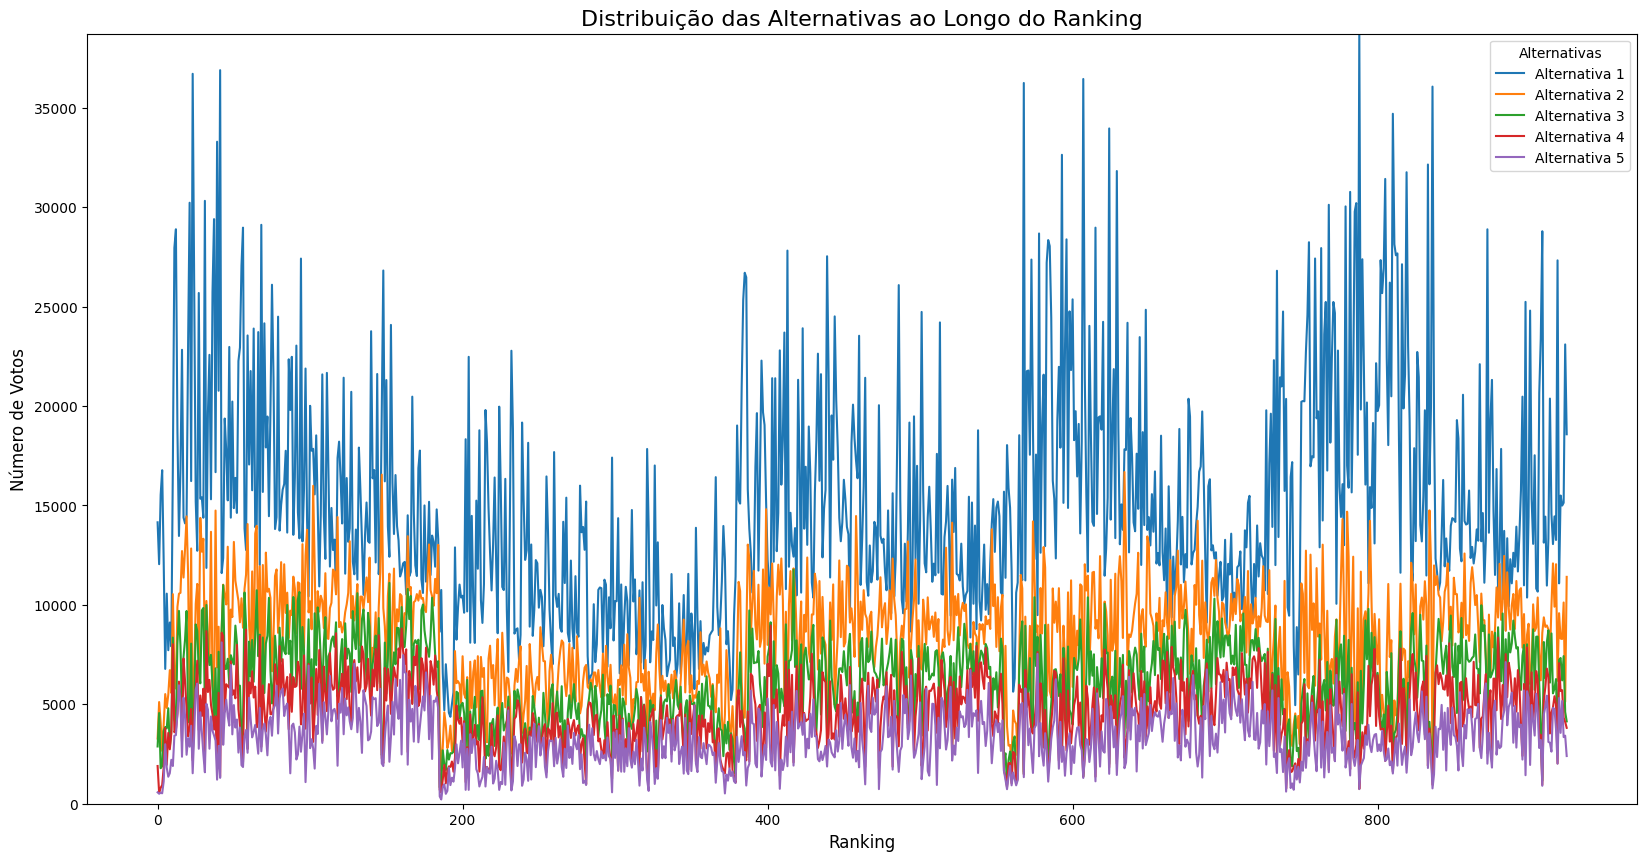

In [ ]:

# Definir o eixo X (o ranking/índice) e o limite do eixo Y
x = df_Rank.index  # Usando o índice como eixo X
y_max = df_Rank[['Alternativa_1', 'Alternativa_2', 'Alternativa_3', 'Alternativa_4', 'Alternativa_5']].max().max()  # Máximo valor das alternativas

# Criando o gráfico
plt.figure(figsize=(20, 10))

# Plotar cada alternativa
sns.lineplot(x=x, y=df_Rank['Alternativa_1'], label='Alternativa 1')
sns.lineplot(x=x, y=df_Rank['Alternativa_2'], label='Alternativa 2')
sns.lineplot(x=x, y=df_Rank['Alternativa_3'], label='Alternativa 3')
sns.lineplot(x=x, y=df_Rank['Alternativa_4'], label='Alternativa 4')
sns.lineplot(x=x, y=df_Rank['Alternativa_5'], label='Alternativa 5')

# Definir o título e os rótulos dos eixos
plt.title('Distribuição das Alternativas ao Longo do Ranking', fontsize=16)
plt.xlabel('Ranking', fontsize=12)
plt.ylabel('Número de Votos', fontsize=12)

# Ajustar os limites do eixo Y para que o gráfico fique proporcional
plt.ylim(0, y_max)

# Exibir a legenda
plt.legend(title="Alternativas")

# Exibir o gráfico
plt.show()


In [ ]:
# Definir o número de linhas por gráfico (185 linhas)
step = 185
n = len(df_Rank)  # Número total de linhas
anos = [2019,2020,2021,2022,2023]

i = 0
# Plotar os dados de 185 em 185 linhas
for start in range(0, n, step):
    # Criar o gráfico com tamanho fixo
    plt.figure(figsize=(20, 10))  # Tamanho do gráfico, ajustado para todos os gráficos
    end = min(start + step, n)  # Garantir que o último gráfico não ultrapasse o número de linhas
    x = range(0, 185)  # Eixo X vai de 0 a 185 (ou até o final do intervalo)

    # Calcular o valor máximo para o intervalo atual
    max_value = df_Rank.iloc[start:end][['Alternativa_1', 'Alternativa_2', 'Alternativa_3', 'Alternativa_4', 'Alternativa_5']].max().max()

    # Definir o limite superior do eixo Y
    y_max = max_value + 2000  # Adiciona 2000 ao valor máximo

    # Plotar as alternativas para o intervalo atual
    sns.lineplot(x=x, y=df_Rank['Alternativa_1'][start:end], label='Alternativa 1')
    sns.lineplot(x=x, y=df_Rank['Alternativa_2'][start:end], label='Alternativa 2')
    sns.lineplot(x=x, y=df_Rank['Alternativa_3'][start:end], label='Alternativa 3')
    sns.lineplot(x=x, y=df_Rank['Alternativa_4'][start:end], label='Alternativa 4')
    sns.lineplot(x=x, y=df_Rank['Alternativa_5'][start:end], label='Alternativa 5')

    # Definir título e rótulos
    plt.title(f'Prova de {anos[i]}', fontsize=16)
    plt.xlabel('Ranking', fontsize=12)
    plt.ylabel('Quantidade de vezes assinalada', fontsize=12)
    i+=1
    # Ajustar os limites do eixo Y para garantir que o gráfico fique proporcional
    plt.ylim(0, y_max)

    # Exibir a legenda
    plt.legend(title="Alternativas")

    # Exibir o gráfico para cada intervalo
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

A análise é feita primeiro plotando a proporção para a competência em cada ano individualmente, depois fazemos o gráfico da competencia juntando os dados de todos os anos.

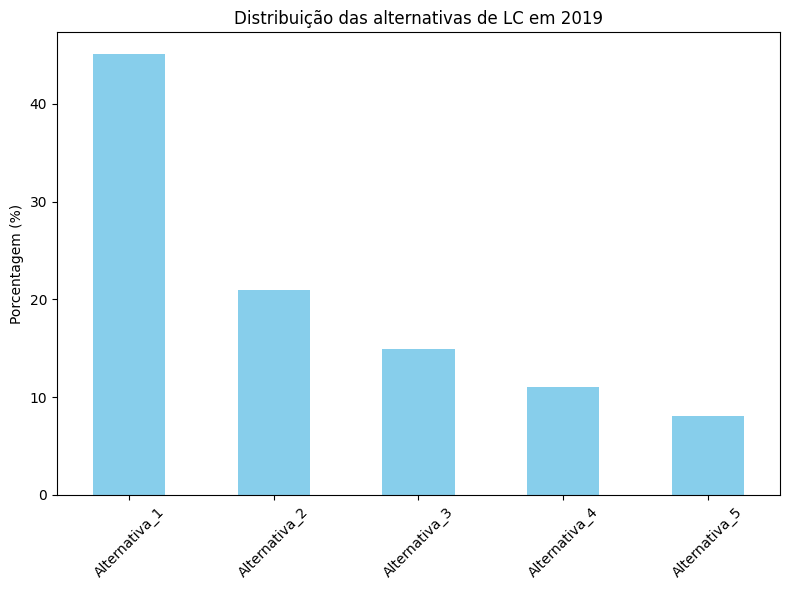

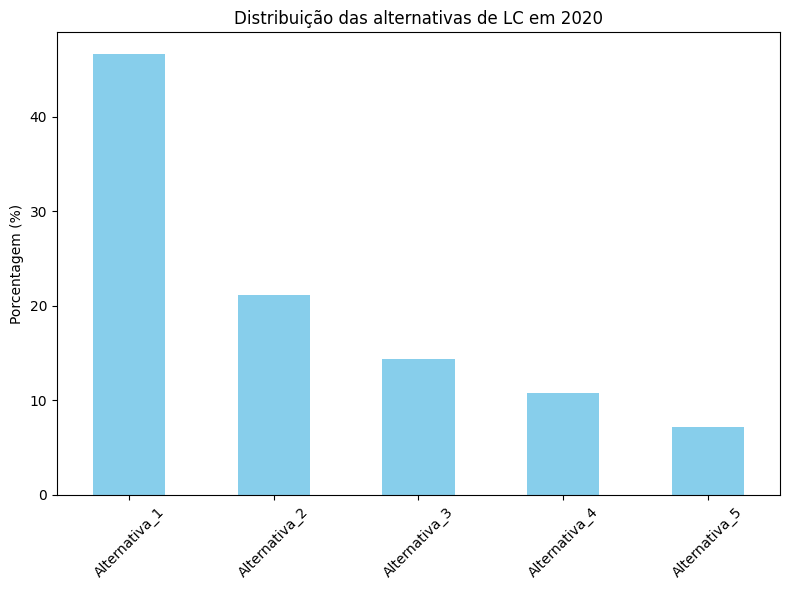

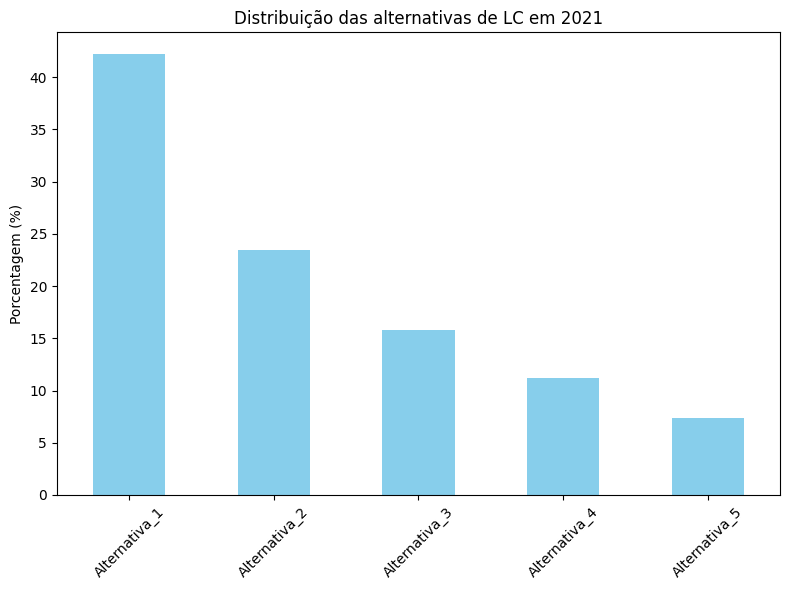

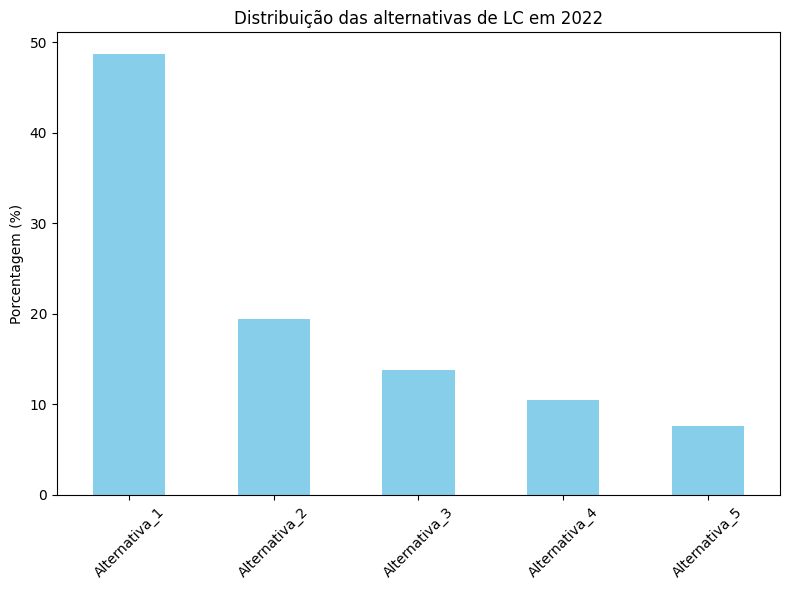

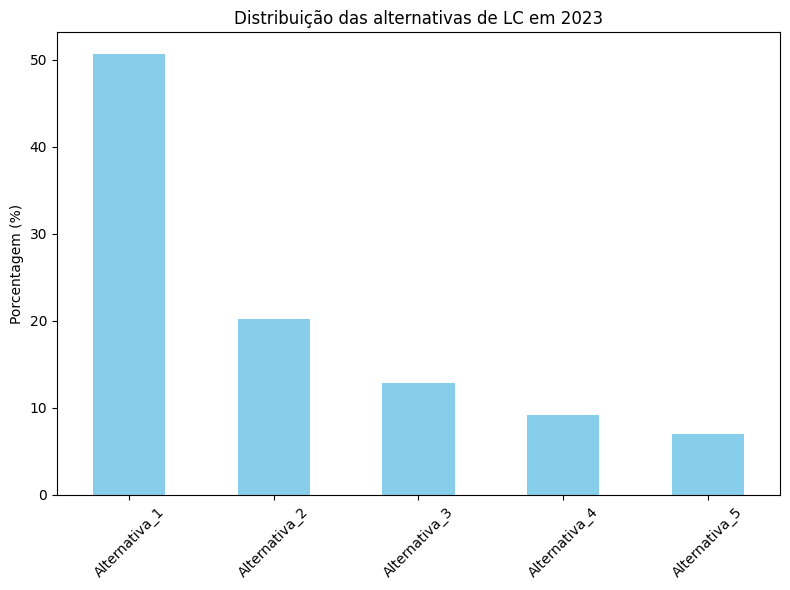

In [ ]:

# Definir as colunas que você quer somar
colunas = ['Alternativa_1', 'Alternativa_2', 'Alternativa_3', 'Alternativa_4', 'Alternativa_5']

# Lista de anos
anos = [2019, 2020, 2021, 2022, 2023]

# Laço para gerar os gráficos para cada ano, com base nas linhas especificadas
for i, ano in enumerate(anos):
    # Definindo a faixa de linhas a ser usada (50 primeiras, 185-235, 320-360, etc.)
    inicio = 0 + (i * 185)  # Ajuste do índice de início
    fim = 50 + (i * 185)  # Ajuste do índice de fim

    # Selecionar as linhas para o ano atual
    df_ano = df_Rank.iloc[inicio:fim]

    # Somar os valores de cada coluna e calcular a porcentagem
    soma_colunas = df_ano[colunas].sum()  # Somar os valores de cada coluna
    soma_total = soma_colunas.sum()  # Soma total de todas as colunas

    # Calcular as porcentagens
    porcentagens = (soma_colunas / soma_total) * 100

    # Plotar o gráfico de barras
    plt.figure(figsize=(8, 6))
    porcentagens.plot(kind='bar', color='skyblue')
    plt.title(f'Distribuição das alternativas de LC em {ano}')
    plt.ylabel('Porcentagem (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


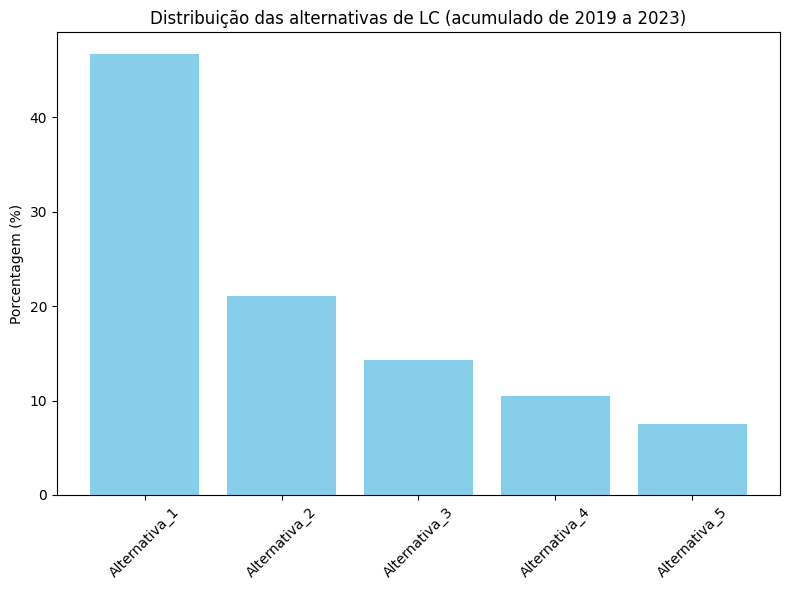

In [ ]:

# Definir as colunas que você quer somar
colunas = ['Alternativa_1', 'Alternativa_2', 'Alternativa_3', 'Alternativa_4', 'Alternativa_5']

# Lista de anos
anos = [2019, 2020, 2021, 2022, 2023]

# Dicionário para acumular os valores de cada ano
soma_total_acumulada = {col: 0 for col in colunas}  # Inicializar com 0 para cada coluna

# Laço para acumular as somas de cada ano
for i, ano in enumerate(anos):
    # Definindo a faixa de linhas a ser usada (50 primeiras, 185-235, 320-360, etc.)
    inicio = 0 + (i * 185)  # Ajuste do índice de início
    fim = 50 + (i * 185)  # Ajuste do índice de fim

    # Selecionar as linhas para o ano atual
    df_ano = df_Rank.iloc[inicio:fim]

    # Somar os valores de cada coluna e adicionar à soma total acumulada
    soma_colunas = df_ano[colunas].sum()  # Somar os valores de cada coluna
    for col in colunas:
        soma_total_acumulada[col] += soma_colunas[col]

# Calcular a soma total de todas as colunas
soma_total = sum(soma_total_acumulada.values())

# Calcular as porcentagens para cada coluna
porcentagens = {col: (valor / soma_total) * 100 for col, valor in soma_total_acumulada.items()}

# Plotar o gráfico de barras com os dados acumulados
plt.figure(figsize=(8, 6))
plt.bar(porcentagens.keys(), porcentagens.values(), color='skyblue')
plt.title('Distribuição das alternativas de LC (acumulado de 2019 a 2023)')
plt.ylabel('Porcentagem (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


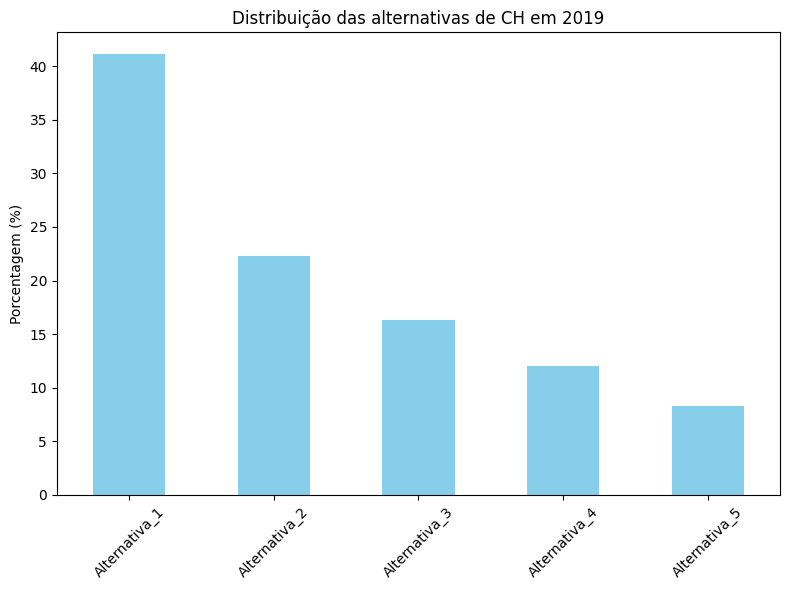

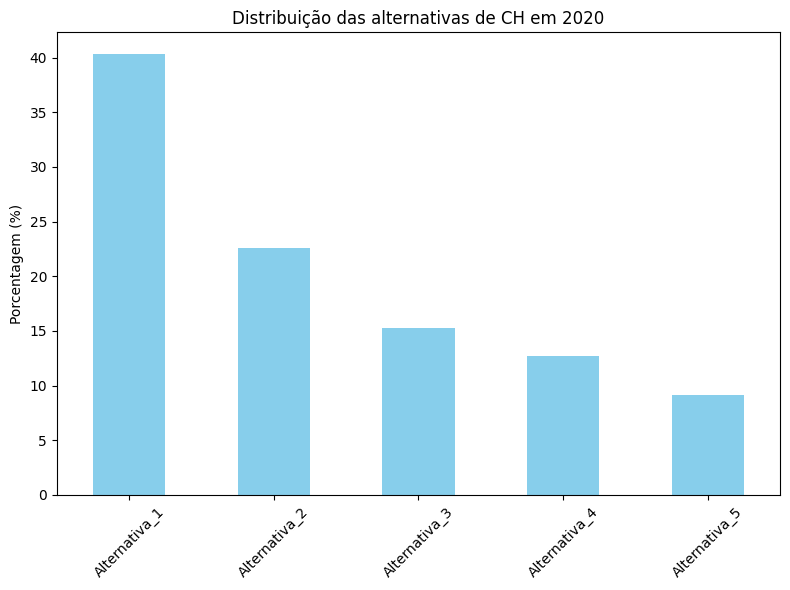

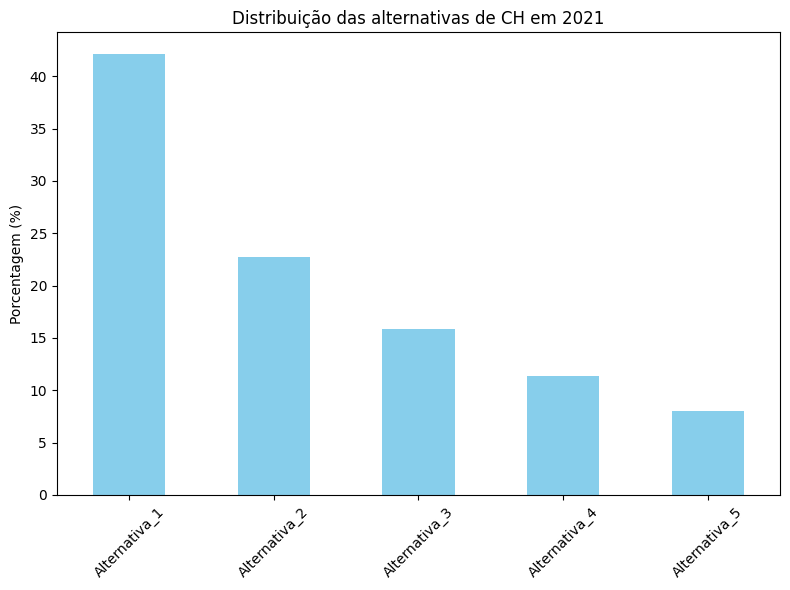

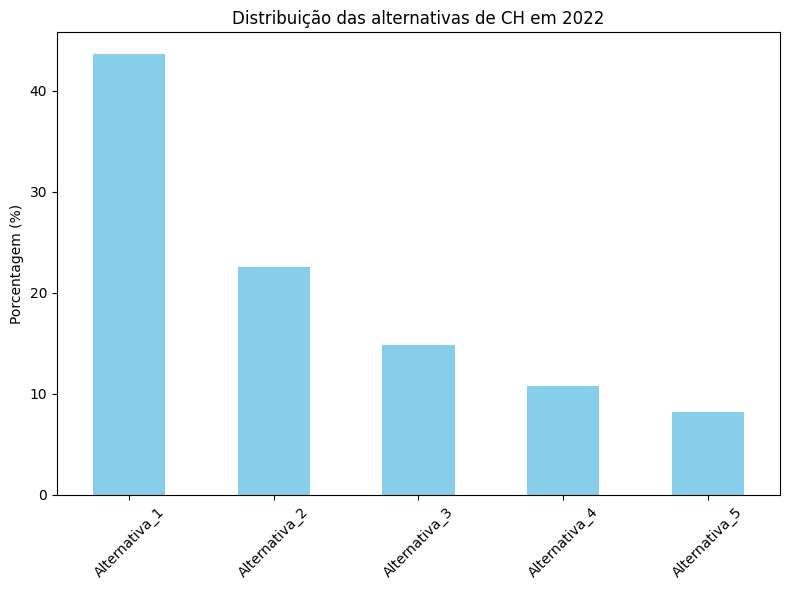

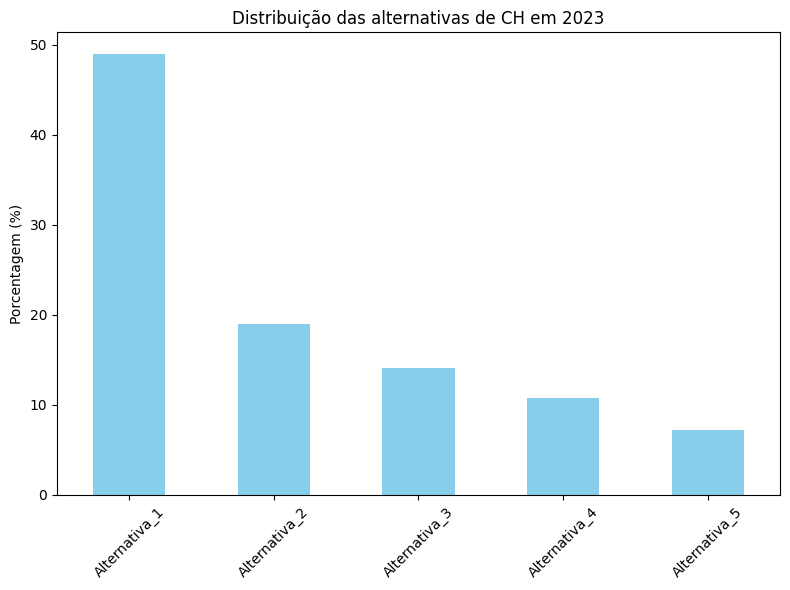

In [ ]:

# Definir as colunas que você quer somar
colunas = ['Alternativa_1', 'Alternativa_2', 'Alternativa_3', 'Alternativa_4', 'Alternativa_5']

# Lista de anos
anos = [2019, 2020, 2021, 2022, 2023]

# Laço para gerar os gráficos para cada ano, com base nas linhas especificadas
for i, ano in enumerate(anos):
    # Definindo a faixa de linhas a ser usada (50 primeiras, 185-235, 320-360, etc.)
    inicio = 50 + (i * 185)  # Ajuste do índice de início
    fim = 95 + (i * 185)  # Ajuste do índice de fim

    # Selecionar as linhas para o ano atual
    df_ano = df_Rank.iloc[inicio:fim]

    # Somar os valores de cada coluna e calcular a porcentagem
    soma_colunas = df_ano[colunas].sum()  # Somar os valores de cada coluna
    soma_total = soma_colunas.sum()  # Soma total de todas as colunas

    # Calcular as porcentagens
    porcentagens = (soma_colunas / soma_total) * 100

    # Plotar o gráfico de barras
    plt.figure(figsize=(8, 6))
    porcentagens.plot(kind='bar', color='skyblue')
    plt.title(f'Distribuição das alternativas de CH em {ano}')
    plt.ylabel('Porcentagem (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


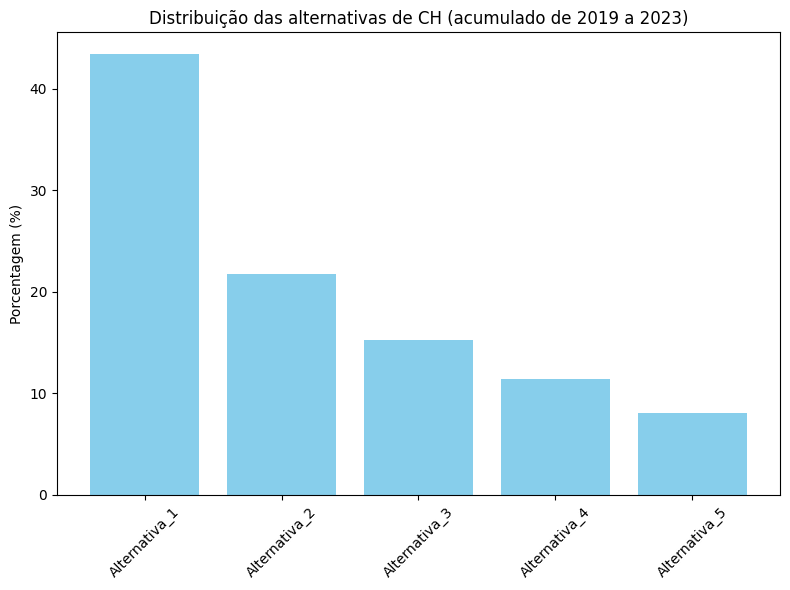

In [ ]:

# Definir as colunas que você quer somar
colunas = ['Alternativa_1', 'Alternativa_2', 'Alternativa_3', 'Alternativa_4', 'Alternativa_5']

# Lista de anos
anos = [2019, 2020, 2021, 2022, 2023]

# Dicionário para acumular os valores de cada ano
soma_total_acumulada = {col: 0 for col in colunas}  # Inicializar com 0 para cada coluna

# Laço para acumular as somas de cada ano
for i, ano in enumerate(anos):
    # Definindo a faixa de linhas a ser usada (50 primeiras, 185-235, 320-360, etc.)
    inicio = 50 + (i * 185)  # Ajuste do índice de início
    fim = 95 + (i * 185)  # Ajuste do índice de fim

    # Selecionar as linhas para o ano atual
    df_ano = df_Rank.iloc[inicio:fim]

    # Somar os valores de cada coluna e adicionar à soma total acumulada
    soma_colunas = df_ano[colunas].sum()  # Somar os valores de cada coluna
    for col in colunas:
        soma_total_acumulada[col] += soma_colunas[col]

# Calcular a soma total de todas as colunas
soma_total = sum(soma_total_acumulada.values())

# Calcular as porcentagens para cada coluna
porcentagens = {col: (valor / soma_total) * 100 for col, valor in soma_total_acumulada.items()}

# Plotar o gráfico de barras com os dados acumulados
plt.figure(figsize=(8, 6))
plt.bar(porcentagens.keys(), porcentagens.values(), color='skyblue')
plt.title('Distribuição das alternativas de CH (acumulado de 2019 a 2023)')
plt.ylabel('Porcentagem (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


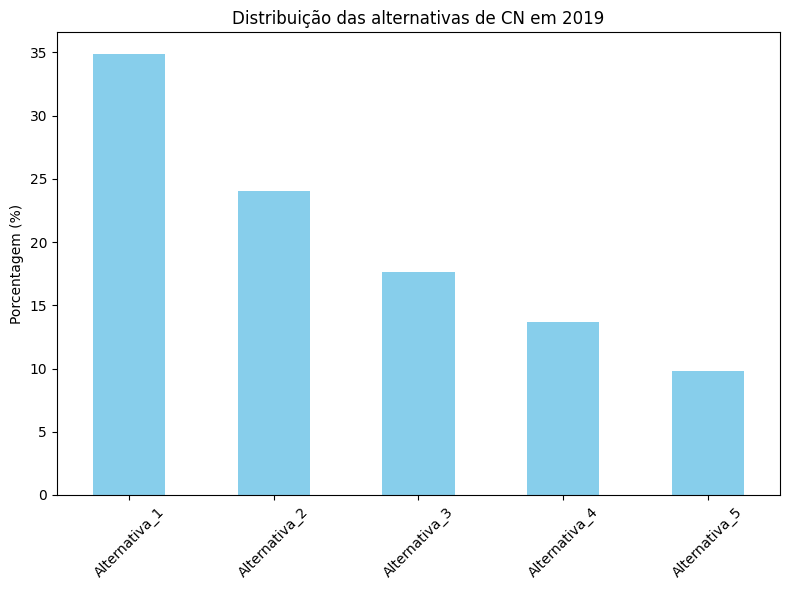

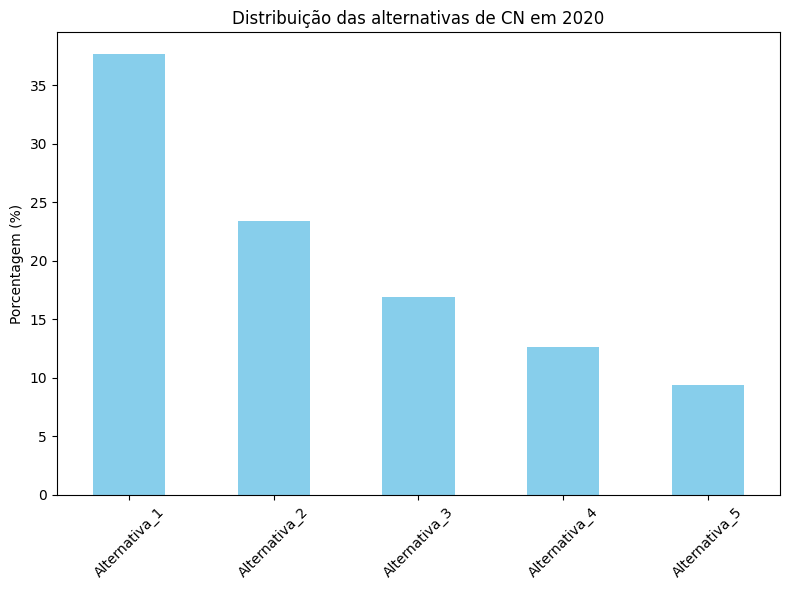

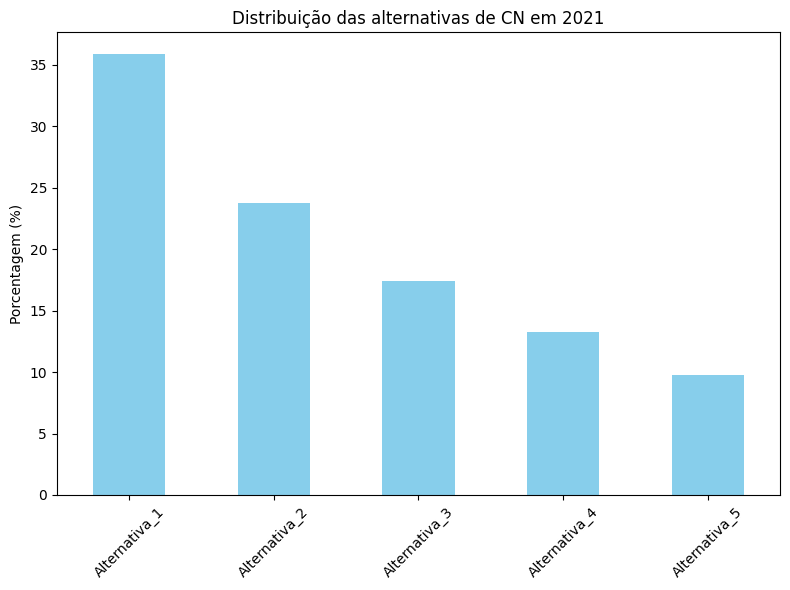

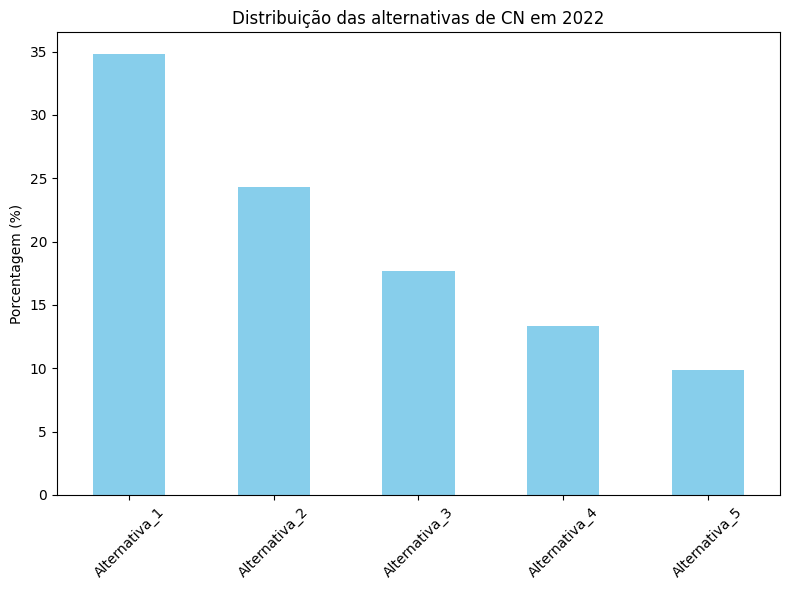

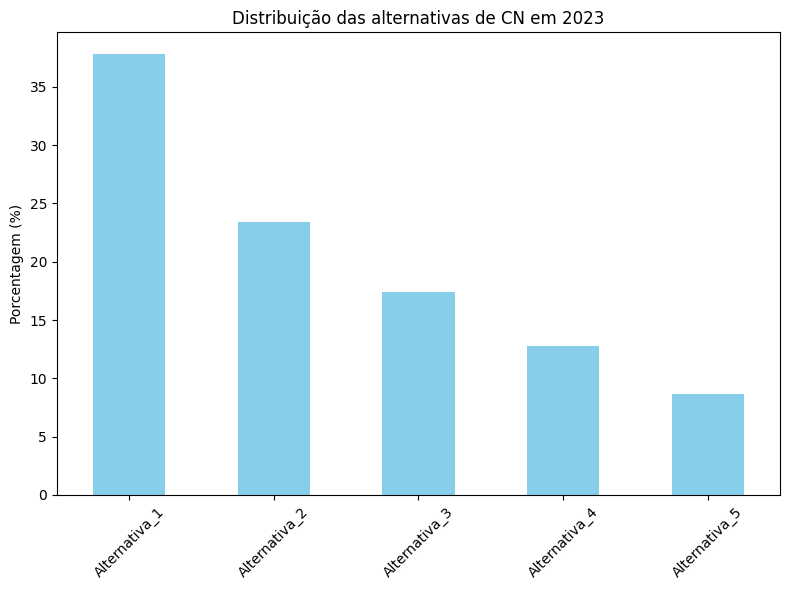

In [ ]:

# Definir as colunas que você quer somar
colunas = ['Alternativa_1', 'Alternativa_2', 'Alternativa_3', 'Alternativa_4', 'Alternativa_5']

# Lista de anos
anos = [2019, 2020, 2021, 2022, 2023]

# Laço para gerar os gráficos para cada ano, com base nas linhas especificadas
for i, ano in enumerate(anos):
    # Definindo a faixa de linhas a ser usada (50 primeiras, 185-235, 320-360, etc.)
    inicio = 95 + (i * 185)  # Ajuste do índice de início
    fim = 140 + (i * 185)  # Ajuste do índice de fim

    # Selecionar as linhas para o ano atual
    df_ano = df_Rank.iloc[inicio:fim]

    # Somar os valores de cada coluna e calcular a porcentagem
    soma_colunas = df_ano[colunas].sum()  # Somar os valores de cada coluna
    soma_total = soma_colunas.sum()  # Soma total de todas as colunas

    # Calcular as porcentagens
    porcentagens = (soma_colunas / soma_total) * 100

    # Plotar o gráfico de barras
    plt.figure(figsize=(8, 6))
    porcentagens.plot(kind='bar', color='skyblue')
    plt.title(f'Distribuição das alternativas de CN em {ano}')
    plt.ylabel('Porcentagem (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


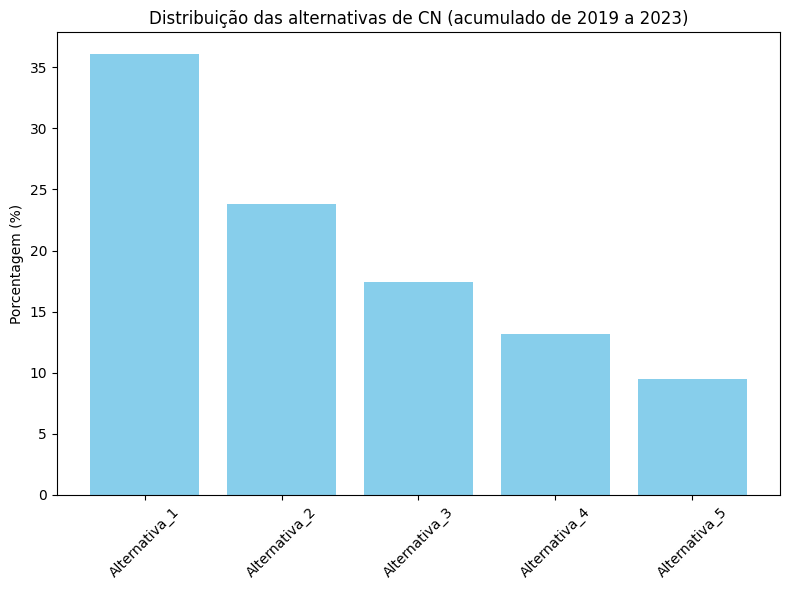

In [ ]:

# Definir as colunas que você quer somar
colunas = ['Alternativa_1', 'Alternativa_2', 'Alternativa_3', 'Alternativa_4', 'Alternativa_5']

# Lista de anos
anos = [2019, 2020, 2021, 2022, 2023]

# Dicionário para acumular os valores de cada ano
soma_total_acumulada = {col: 0 for col in colunas}  # Inicializar com 0 para cada coluna

# Laço para acumular as somas de cada ano
for i, ano in enumerate(anos):
    # Definindo a faixa de linhas a ser usada (50 primeiras, 185-235, 320-360, etc.)
    inicio = 95 + (i * 185)  # Ajuste do índice de início
    fim = 140 + (i * 185)  # Ajuste do índice de fim

    # Selecionar as linhas para o ano atual
    df_ano = df_Rank.iloc[inicio:fim]

    # Somar os valores de cada coluna e adicionar à soma total acumulada
    soma_colunas = df_ano[colunas].sum()  # Somar os valores de cada coluna
    for col in colunas:
        soma_total_acumulada[col] += soma_colunas[col]

# Calcular a soma total de todas as colunas
soma_total = sum(soma_total_acumulada.values())

# Calcular as porcentagens para cada coluna
porcentagens = {col: (valor / soma_total) * 100 for col, valor in soma_total_acumulada.items()}

# Plotar o gráfico de barras com os dados acumulados
plt.figure(figsize=(8, 6))
plt.bar(porcentagens.keys(), porcentagens.values(), color='skyblue')
plt.title('Distribuição das alternativas de CN (acumulado de 2019 a 2023)')
plt.ylabel('Porcentagem (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


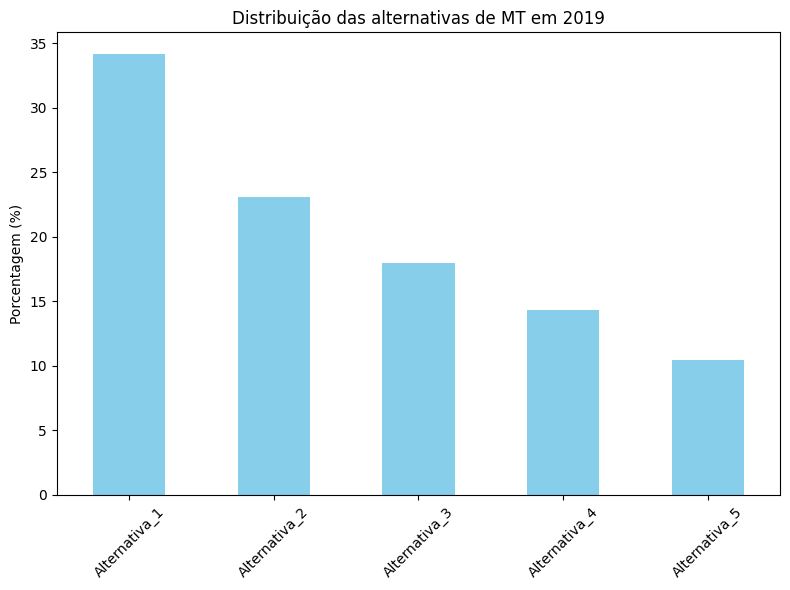

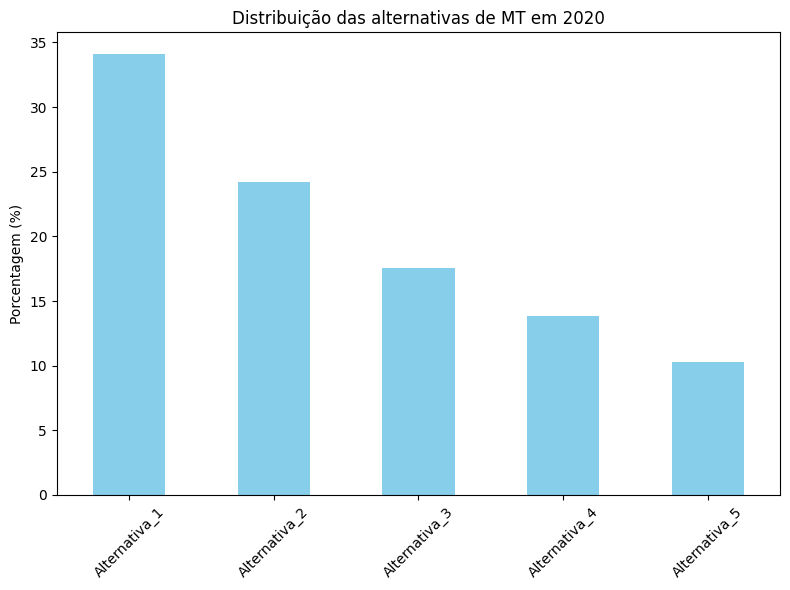

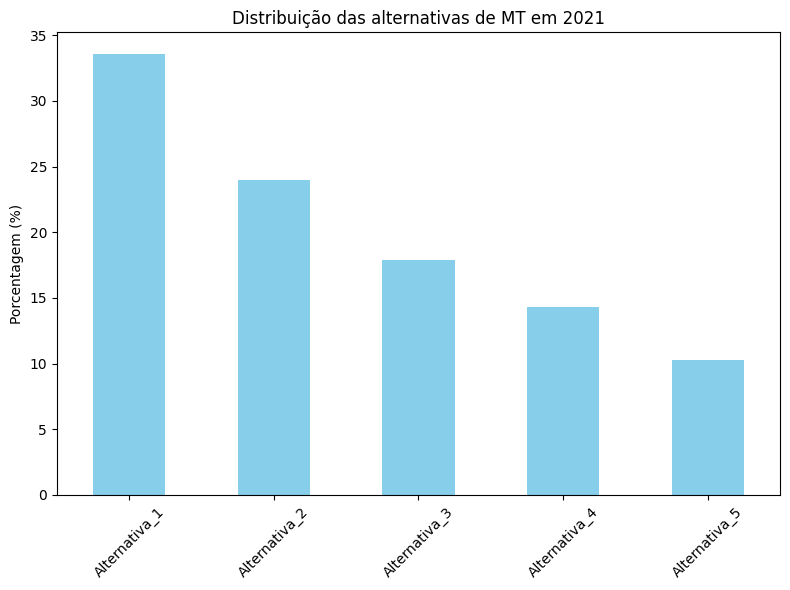

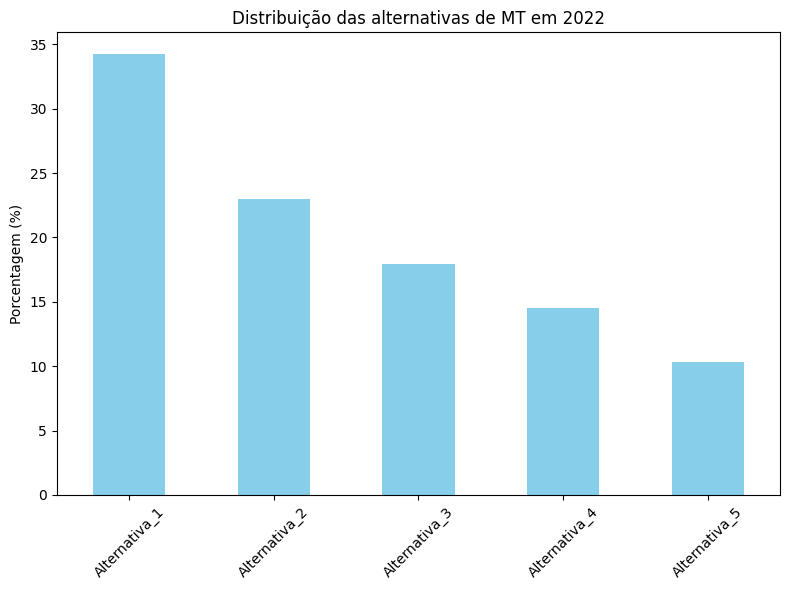

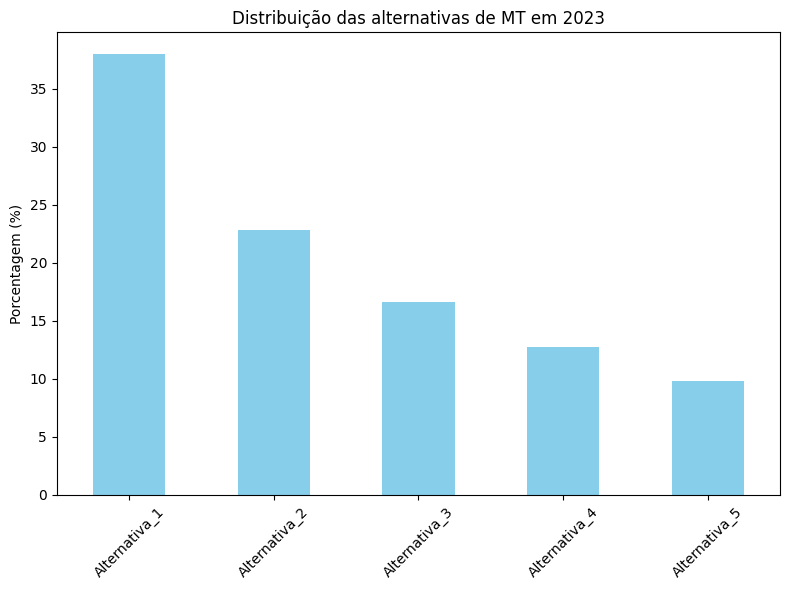

In [ ]:

# Definir as colunas que você quer somar
colunas = ['Alternativa_1', 'Alternativa_2', 'Alternativa_3', 'Alternativa_4', 'Alternativa_5']

# Lista de anos
anos = [2019, 2020, 2021, 2022, 2023]

# Laço para gerar os gráficos para cada ano, com base nas linhas especificadas
for i, ano in enumerate(anos):
    # Definindo a faixa de linhas a ser usada (50 primeiras, 185-235, 320-360, etc.)
    inicio = 140 + (i * 185)  # Ajuste do índice de início
    fim = 185 + (i * 185)  # Ajuste do índice de fim

    # Selecionar as linhas para o ano atual
    df_ano = df_Rank.iloc[inicio:fim]

    # Somar os valores de cada coluna e calcular a porcentagem
    soma_colunas = df_ano[colunas].sum()  # Somar os valores de cada coluna
    soma_total = soma_colunas.sum()  # Soma total de todas as colunas

    # Calcular as porcentagens
    porcentagens = (soma_colunas / soma_total) * 100

    # Plotar o gráfico de barras
    plt.figure(figsize=(8, 6))
    porcentagens.plot(kind='bar', color='skyblue')
    plt.title(f'Distribuição das alternativas de MT em {ano}')
    plt.ylabel('Porcentagem (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


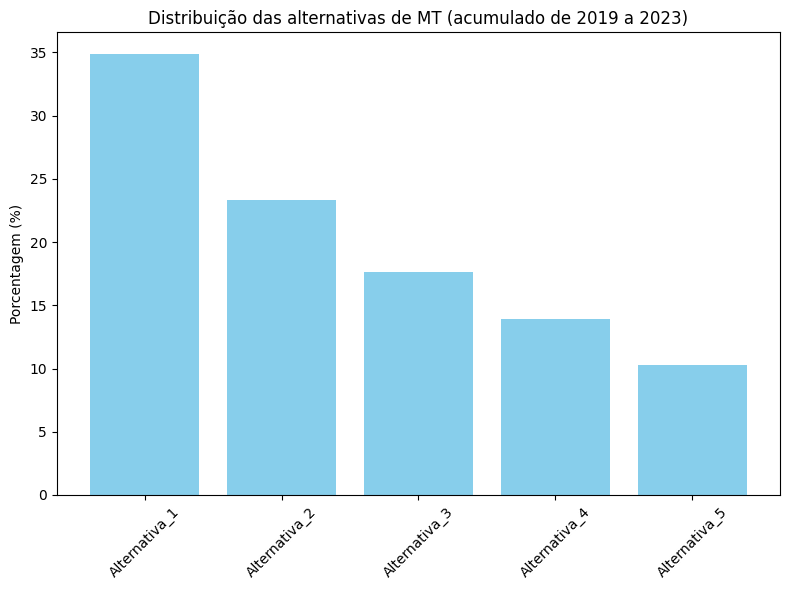

In [ ]:

# Definir as colunas que você quer somar
colunas = ['Alternativa_1', 'Alternativa_2', 'Alternativa_3', 'Alternativa_4', 'Alternativa_5']

# Lista de anos
anos = [2019, 2020, 2021, 2022, 2023]

# Dicionário para acumular os valores de cada ano
soma_total_acumulada = {col: 0 for col in colunas}  # Inicializar com 0 para cada coluna

# Laço para acumular as somas de cada ano
for i, ano in enumerate(anos):
    # Definindo a faixa de linhas a ser usada (50 primeiras, 185-235, 320-360, etc.)
    inicio = 140 + (i * 185)  # Ajuste do índice de início
    fim = 185 + (i * 185)  # Ajuste do índice de fim

    # Selecionar as linhas para o ano atual
    df_ano = df_Rank.iloc[inicio:fim]

    # Somar os valores de cada coluna e adicionar à soma total acumulada
    soma_colunas = df_ano[colunas].sum()  # Somar os valores de cada coluna
    for col in colunas:
        soma_total_acumulada[col] += soma_colunas[col]

# Calcular a soma total de todas as colunas
soma_total = sum(soma_total_acumulada.values())

# Calcular as porcentagens para cada coluna
porcentagens = {col: (valor / soma_total) * 100 for col, valor in soma_total_acumulada.items()}

# Plotar o gráfico de barras com os dados acumulados
plt.figure(figsize=(8, 6))
plt.bar(porcentagens.keys(), porcentagens.values(), color='skyblue')
plt.title('Distribuição das alternativas de MT (acumulado de 2019 a 2023)')
plt.ylabel('Porcentagem (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Agora o gráfico abaixo será feito analisando o dataset inteiro

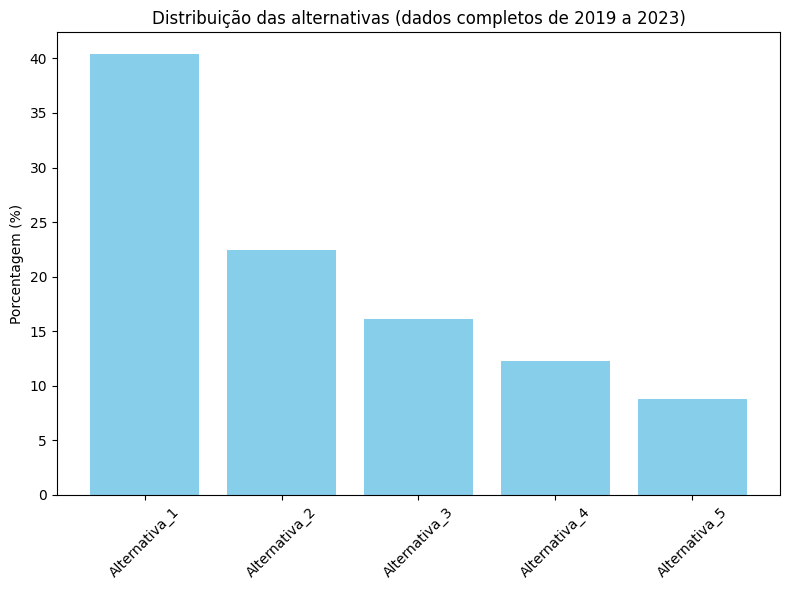

In [ ]:
import matplotlib.pyplot as plt

# Definir as colunas que você quer somar
colunas = ['Alternativa_1', 'Alternativa_2', 'Alternativa_3', 'Alternativa_4', 'Alternativa_5']

# Dicionário para acumular os valores de todas as linhas
soma_total_acumulada = {col: 0 for col in colunas}  # Inicializar com 0 para cada coluna

# Laço para acumular as somas de todas as linhas do dataset
for col in colunas:
    soma_total_acumulada[col] += df_Rank[col].sum()  # Somar os valores de cada coluna em todo o dataset

# Calcular a soma total de todas as colunas
soma_total = sum(soma_total_acumulada.values())

# Calcular as porcentagens para cada coluna
porcentagens = {col: (valor / soma_total) * 100 for col, valor in soma_total_acumulada.items()}

# Plotar o gráfico de barras com os dados acumulados
plt.figure(figsize=(8, 6))
plt.bar(porcentagens.keys(), porcentagens.values(), color='skyblue')
plt.title('Distribuição das alternativas (dados completos de 2019 a 2023)')
plt.ylabel('Porcentagem (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Boxplot referente aos valores das proporções de cada alternativa por questão da prova.

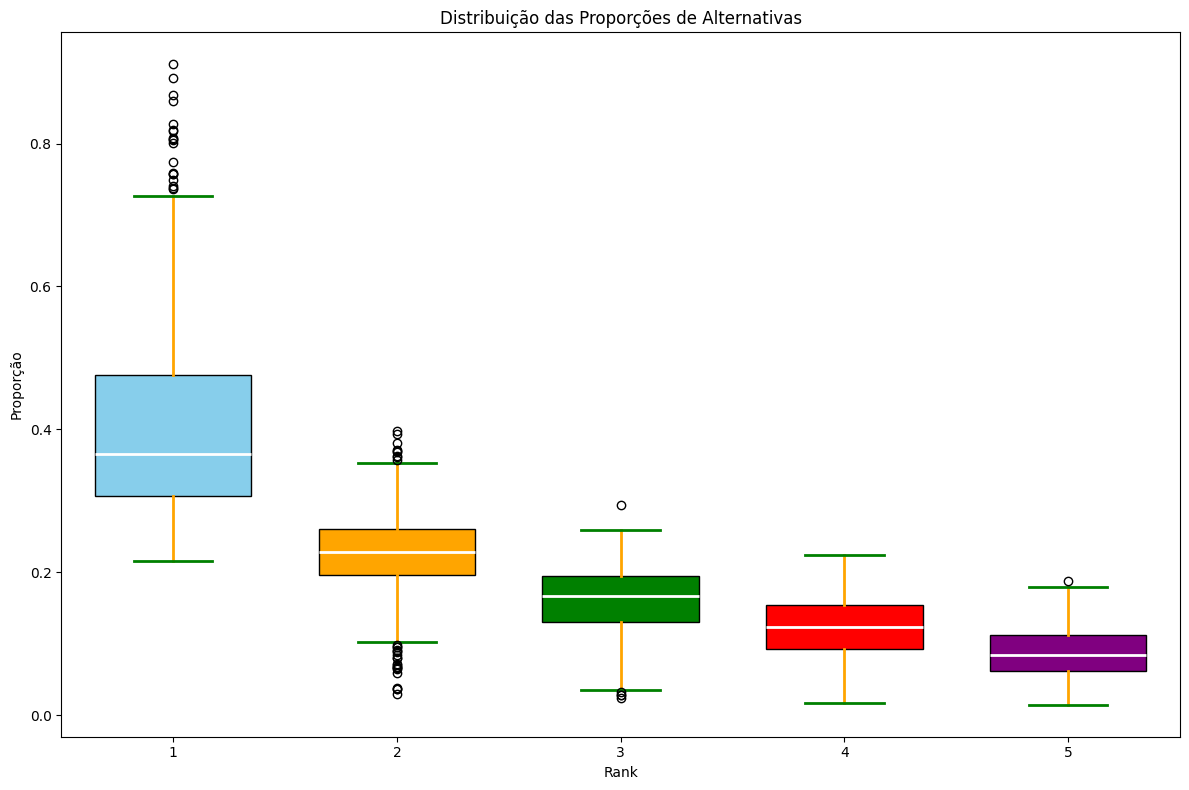

In [ ]:
# Definir as colunas que você quer somar
colunas = ['Alternativa_1', 'Alternativa_2', 'Alternativa_3', 'Alternativa_4', 'Alternativa_5']

# Lista para armazenar as proporções de cada linha
proporcoes = []

# Laço para calcular as proporções e armazená-las
for index, row in df_Rank.iterrows():
    soma_linha = row[colunas].sum()  # Soma total da linha
    proporcao_linha = row[colunas] / soma_linha  # Proporção de cada coluna na linha
    proporcoes.append(proporcao_linha)  # Armazenar o vetor de proporções

# Converter a lista de proporções em um DataFrame para facilitar o plot
df_proporcoes = pd.DataFrame(proporcoes, columns=colunas)

# Dados para o boxplot (matplotlib)
data = [df_proporcoes[col] for col in colunas]

# Definir cores para cada componente do boxplot
cores = ['skyblue', 'orange', 'green', 'red', 'purple']

# Criar o boxplot usando matplotlib
plt.figure(figsize=(12, 8))
box = plt.boxplot(data, patch_artist=True, vert=True, widths=0.7)

# Definir a cor de cada caixa
for i, patch in enumerate(box['boxes']):
    patch.set_facecolor(cores[i])  # Definir a cor da caixa individual

# Definir as cores dos bigodes, medianas e extremidades
for whisker in box['whiskers']:
    whisker.set(color='orange', linewidth=2)
for cap in box['caps']:
    cap.set(color='green', linewidth=2)
for median in box['medians']:
    median.set(color='white', linewidth=2)

# Adicionar título e rótulos
plt.title('Distribuição das Proporções de Alternativas')
plt.xlabel('Rank')
plt.ylabel('Proporção')
plt.xticks(range(1, len(colunas) + 1), [1, 2, 3, 4, 5])  # Alterar os rótulos do eixo x para 1, 2, 3, 4, 5

# Ajustar layout para garantir que o gráfico fique bem posicionado
plt.tight_layout()
plt.show()


In [ ]:
df_Rank

,ID_QUESTAO,Alternativa_1,Alternativa_2,Alternativa_3,Alternativa_4,Alternativa_5,Letra_Alternativa_1,Questao_Mais_Assinalada_Era_Correta,Contagem Alternativa Certa
0,2019001,14153.0,3280.0,2879.0,1897.0,573.0,B,1.0,14153.0
1,2019002,12047.0,5113.0,4561.0,549.0,502.0,D,1.0,12047.0
2,2019003,15530.0,4089.0,1786.0,799.0,553.0,A,1.0,15530.0
3,2019004,16773.0,2656.0,1890.0,939.0,524.0,B,1.0,16773.0
4,2019005,12122.0,4007.0,3671.0,1832.0,1128.0,E,1.0,12122.0
...,...,...,...,...,...,...,...,...,...
920,2023181,15500.0,8308.0,7329.0,5669.0,3563.0,E,1.0,15500.0
921,2023182,14995.0,8284.0,6202.0,5709.0,5164.0,A,1.0,14995.0
922,2023183,15134.0,10120.0,7424.0,4325.0,3351.0,C,0.0,10120.0
923,2023184,23099.0,5124.0,4616.0,4114.0,3422.0,C,1.0,23099.0


Gráfico que contem quantas vezes a alternativa certa caiu em cada posição

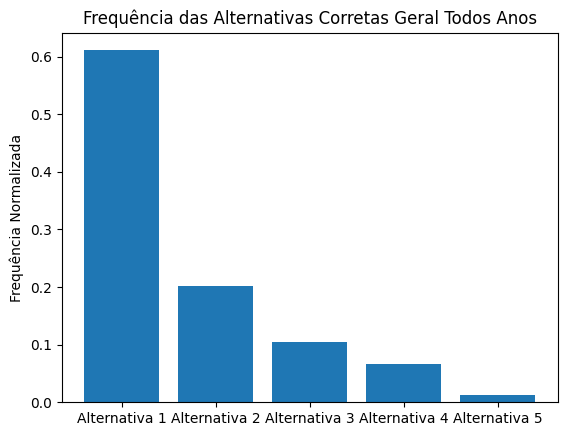

In [ ]:

# Inicializar o vetor de frequências para as alternativas
frequencias = [0] * 5

# Iterar pelas linhas e comparar as alternativas
for i, row in df_Rank.iterrows():
    contagem_correta = row['Contagem Alternativa Certa']

    # Verificar qual alternativa corresponde à contagem correta
    for j in range(1, 6):  # Alternativa_1 até Alternativa_5
        if contagem_correta == row[f'Alternativa_{j}']:
            frequencias[j - 1] += 1  # Incrementar o valor correspondente à alternativa

# Normalizar as frequências dividindo pelo total de linhas (925)
frequencias_normalizadas = [f / 925 for f in frequencias]

# Plotar o gráfico de barras
plt.bar([f'Alternativa {i+1}' for i in range(5)], frequencias_normalizadas)
# plt.xlabel('Alternativas')
plt.ylabel('Frequência Normalizada')
plt.title('Frequência das Alternativas Corretas Geral Todos Anos')
plt.show()

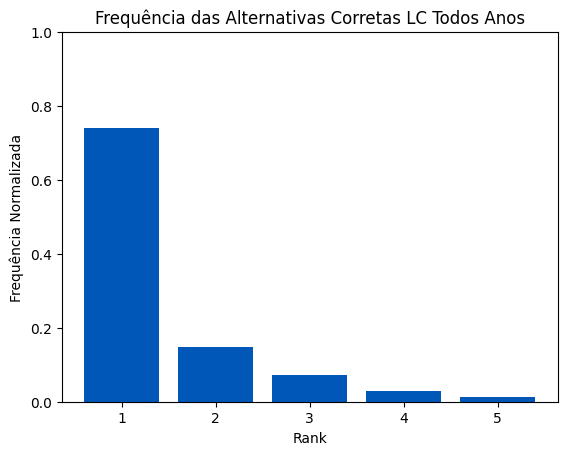

In [8]:
# Inicializar o vetor de frequências para as alternativas
frequencias = [0] * 5

# Lista de anos
anos = [2019, 2020, 2021, 2022, 2023]

# Laço para acumular as somas de cada ano
for i, ano in enumerate(anos):
    # Definindo a faixa de linhas a ser usada (50 primeiras, 185-235, 320-360, etc.)
    inicio = 0 + (i * 185)  # Ajuste do índice de início
    fim = 50 + (i * 185)  # Ajuste do índice de fim

    # Selecionar as linhas para o ano atual
    df_ano = df_Rank.iloc[inicio:fim]

    # Iterar pelas linhas e comparar as alternativas
    for i, row in df_ano.iterrows():
        contagem_correta = row['Contagem Alternativa Certa']

        # Verificar qual alternativa corresponde à contagem correta
        for j in range(1, 6):  # Alternativa_1 até Alternativa_5
            if contagem_correta == row[f'Alternativa_{j}']:
                frequencias[j - 1] += 1  # Incrementar o valor correspondente à alternativa

# Normalizar as frequências dividindo pelo total de linhas
frequencias_normalizadas = [f / 250 for f in frequencias]

# Plotar o gráfico de barras
plt.bar([f'{i+1}' for i in range(5)], frequencias_normalizadas, color='#0057b7')
# plt.xlabel('Alternativas')
plt.ylim(0,1)
plt.xlabel('Rank')
plt.ylabel('Frequência Normalizada')
plt.title('Frequência das Alternativas Corretas LC Todos Anos')
plt.show()


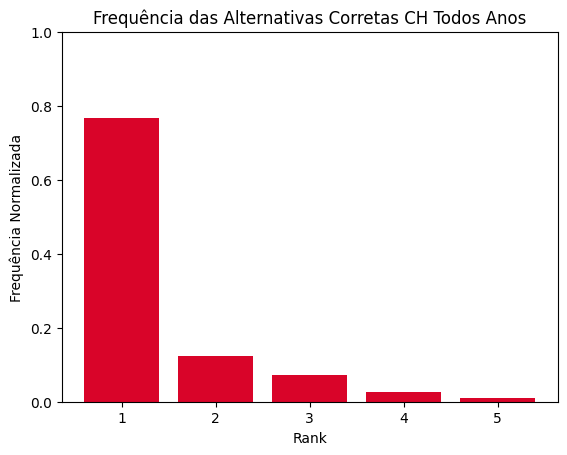

In [9]:
# Inicializar o vetor de frequências para as alternativas
frequencias = [0] * 5

# Lista de anos
anos = [2019, 2020, 2021, 2022, 2023]

# Laço para acumular as somas de cada ano
for i, ano in enumerate(anos):
    # Definindo a faixa de linhas a ser usada (50 primeiras, 185-235, 320-360, etc.)
    inicio = 50 + (i * 185)  # Ajuste do índice de início
    fim = 95 + (i * 185)  # Ajuste do índice de fim

    # Selecionar as linhas para o ano atual
    df_ano = df_Rank.iloc[inicio:fim]

    # Iterar pelas linhas e comparar as alternativas
    for i, row in df_ano.iterrows():
        contagem_correta = row['Contagem Alternativa Certa']

        # Verificar qual alternativa corresponde à contagem correta
        for j in range(1, 6):  # Alternativa_1 até Alternativa_5
            if contagem_correta == row[f'Alternativa_{j}']:
                frequencias[j - 1] += 1  # Incrementar o valor correspondente à alternativa

# Normalizar as frequências dividindo pelo total de linhas
frequencias_normalizadas = [f / 225 for f in frequencias]

# Plotar o gráfico de barras
# Plotar o gráfico de barras
plt.bar([f'{i+1}' for i in range(5)], frequencias_normalizadas, color='#d90429')
# plt.xlabel('Alternativas')
plt.ylim(0,1)
plt.xlabel('Rank')
plt.ylabel('Frequência Normalizada')
plt.title('Frequência das Alternativas Corretas CH Todos Anos')
plt.show()


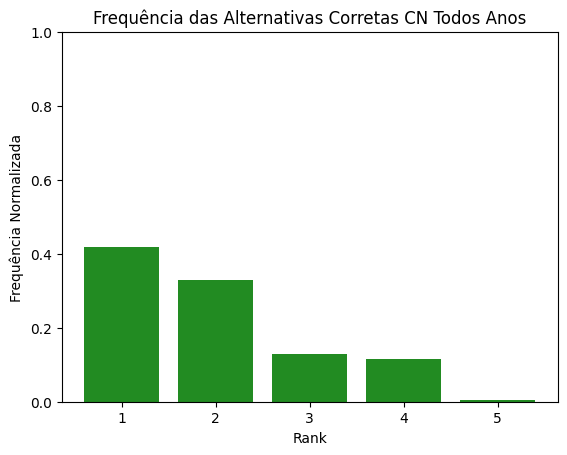

In [10]:
# Inicializar o vetor de frequências para as alternativas
frequencias = [0] * 5

# Lista de anos
anos = [2019, 2020, 2021, 2022, 2023]

# Laço para acumular as somas de cada ano
for i, ano in enumerate(anos):
    # Definindo a faixa de linhas a ser usada (50 primeiras, 185-235, 320-360, etc.)
    inicio = 95 + (i * 185)  # Ajuste do índice de início
    fim = 140 + (i * 185)  # Ajuste do índice de fim

    # Selecionar as linhas para o ano atual
    df_ano = df_Rank.iloc[inicio:fim]

    # Iterar pelas linhas e comparar as alternativas
    for i, row in df_ano.iterrows():
        contagem_correta = row['Contagem Alternativa Certa']

        # Verificar qual alternativa corresponde à contagem correta
        for j in range(1, 6):  # Alternativa_1 até Alternativa_5
            if contagem_correta == row[f'Alternativa_{j}']:
                frequencias[j - 1] += 1  # Incrementar o valor correspondente à alternativa

# Normalizar as frequências dividindo pelo total de linhas
frequencias_normalizadas = [f / 225 for f in frequencias]

plt.bar([f'{i+1}' for i in range(5)], frequencias_normalizadas, color='#228B22')
# plt.xlabel('Alternativas')
plt.ylim(0,1)
plt.xlabel('Rank')
plt.ylabel('Frequência Normalizada')
plt.title('Frequência das Alternativas Corretas CN Todos Anos')
plt.show()


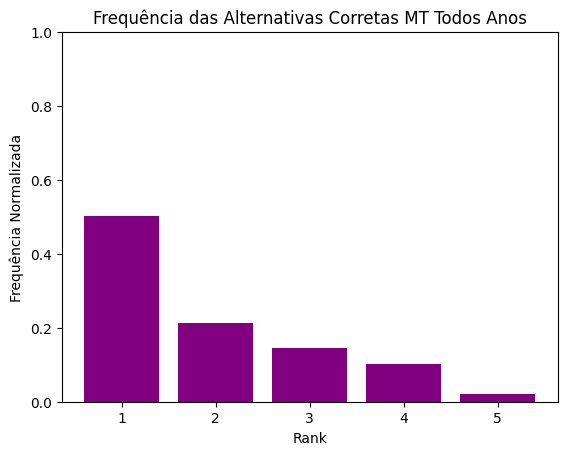

In [11]:
# Inicializar o vetor de frequências para as alternativas
frequencias = [0] * 5

# Lista de anos
anos = [2019, 2020, 2021, 2022, 2023]

# Laço para acumular as somas de cada ano
for i, ano in enumerate(anos):
    # Definindo a faixa de linhas a ser usada (50 primeiras, 185-235, 320-360, etc.)
    inicio = 140 + (i * 185)  # Ajuste do índice de início
    fim = 185 + (i * 185)  # Ajuste do índice de fim

    # Selecionar as linhas para o ano atual
    df_ano = df_Rank.iloc[inicio:fim]

    # Iterar pelas linhas e comparar as alternativas
    for i, row in df_ano.iterrows():
        contagem_correta = row['Contagem Alternativa Certa']

        # Verificar qual alternativa corresponde à contagem correta
        for j in range(1, 6):  # Alternativa_1 até Alternativa_5
            if contagem_correta == row[f'Alternativa_{j}']:
                frequencias[j - 1] += 1  # Incrementar o valor correspondente à alternativa

# Normalizar as frequências dividindo pelo total de linhas
frequencias_normalizadas = [f / 225 for f in frequencias]

# Plotar o gráfico de barras
plt.bar([f'{i+1}' for i in range(5)], frequencias_normalizadas, color='#800080')
# plt.xlabel('Alternativas')
plt.ylim(0,1)
plt.xlabel('Rank')
plt.ylabel('Frequência Normalizada')
plt.title('Frequência das Alternativas Corretas MT Todos Anos')
plt.show()


In [ ]:
df_Rank

,ID_QUESTAO,Alternativa_1,Alternativa_2,Alternativa_3,Alternativa_4,Alternativa_5,Letra_Alternativa_1,Questao_Mais_Assinalada_Era_Correta,Contagem Alternativa Certa
0,2019001,14153.0,3280.0,2879.0,1897.0,573.0,B,1.0,14153.0
1,2019002,12047.0,5113.0,4561.0,549.0,502.0,D,1.0,12047.0
2,2019003,15530.0,4089.0,1786.0,799.0,553.0,A,1.0,15530.0
3,2019004,16773.0,2656.0,1890.0,939.0,524.0,B,1.0,16773.0
4,2019005,12122.0,4007.0,3671.0,1832.0,1128.0,E,1.0,12122.0
...,...,...,...,...,...,...,...,...,...
920,2023181,15500.0,8308.0,7329.0,5669.0,3563.0,E,1.0,15500.0
921,2023182,14995.0,8284.0,6202.0,5709.0,5164.0,A,1.0,14995.0
922,2023183,15134.0,10120.0,7424.0,4325.0,3351.0,C,0.0,10120.0
923,2023184,23099.0,5124.0,4616.0,4114.0,3422.0,C,1.0,23099.0


In [13]:
df_2019 = df_Rank.iloc[:185, :]
df_2020 = df_Rank.iloc[185:370, :]
df_2021 = df_Rank.iloc[370:555, :]
df_2022 = df_Rank.iloc[555:740, :]
df_2023 = df_Rank.iloc[740:, :]

In [14]:
df_2019_dia1_lc = df_Rank.iloc[:50, :]
df_2019_dia1_ch = df_Rank.iloc[50:95, :]
df_2019_dia2_cn = df_Rank.iloc[95:140, :]
df_2019_dia2_mt = df_Rank.iloc[140:185, :]

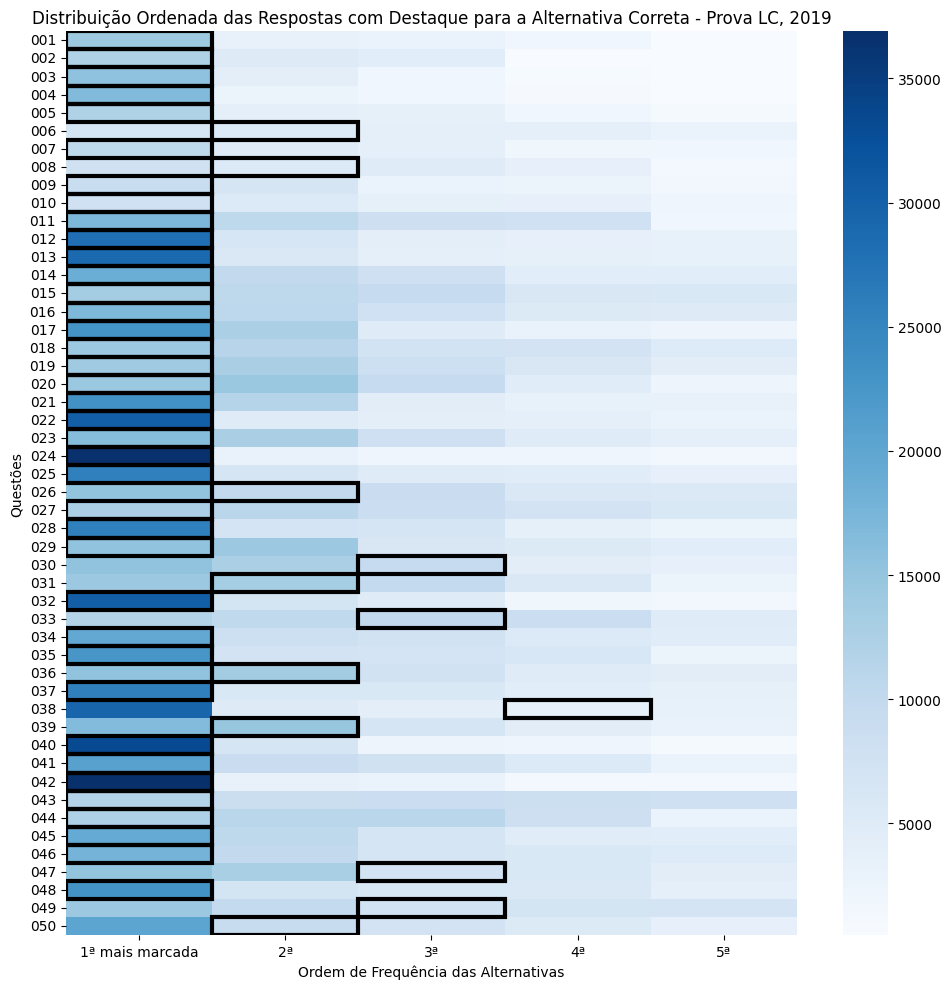

In [ ]:
# Garantir que as colunas estejam no tipo numérico
# contagem_ordenada[['1', '2', '3', '4', '5']] = contagem_ordenada[['1', '2', '3', '4', '5']].apply(pd.to_numeric, errors='coerce')

# Dados para o heatmap
heatmap_data_ord = df_2019_dia1_lc[['Alternativa_1', 'Alternativa_2', 'Alternativa_3', 'Alternativa_4', 'Alternativa_5']]

# Criar o heatmap
plt.figure(figsize=(10, 10))
ax = sns.heatmap(heatmap_data_ord, annot=False, cmap='Blues', cbar=True,
                 xticklabels=['1ª mais marcada', '2ª', '3ª', '4ª', '5ª'],
                 yticklabels=df_2019_dia1_lc['ID_QUESTAO'].str[-3:])


# Adicionar retângulo ao redor do valor da alternativa correta
for i, valor_certo in enumerate(df_2019_dia1_lc['Contagem Alternativa Certa']):
    # Verificar em qual coluna (1 a 5) o valor da resposta correta aparece
    for j in range(5):  # colunas 0 a 4
        if heatmap_data_ord.iloc[i, j] == valor_certo:
            # Adicionar retângulo
            ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, color='black', lw=3))
            break  # só marcar uma vez

plt.title('Distribuição Ordenada das Respostas com Destaque para a Alternativa Correta - Prova LC, 2019')
plt.xlabel('Ordem de Frequência das Alternativas')
plt.ylabel('Questões')
plt.tight_layout()
plt.show()

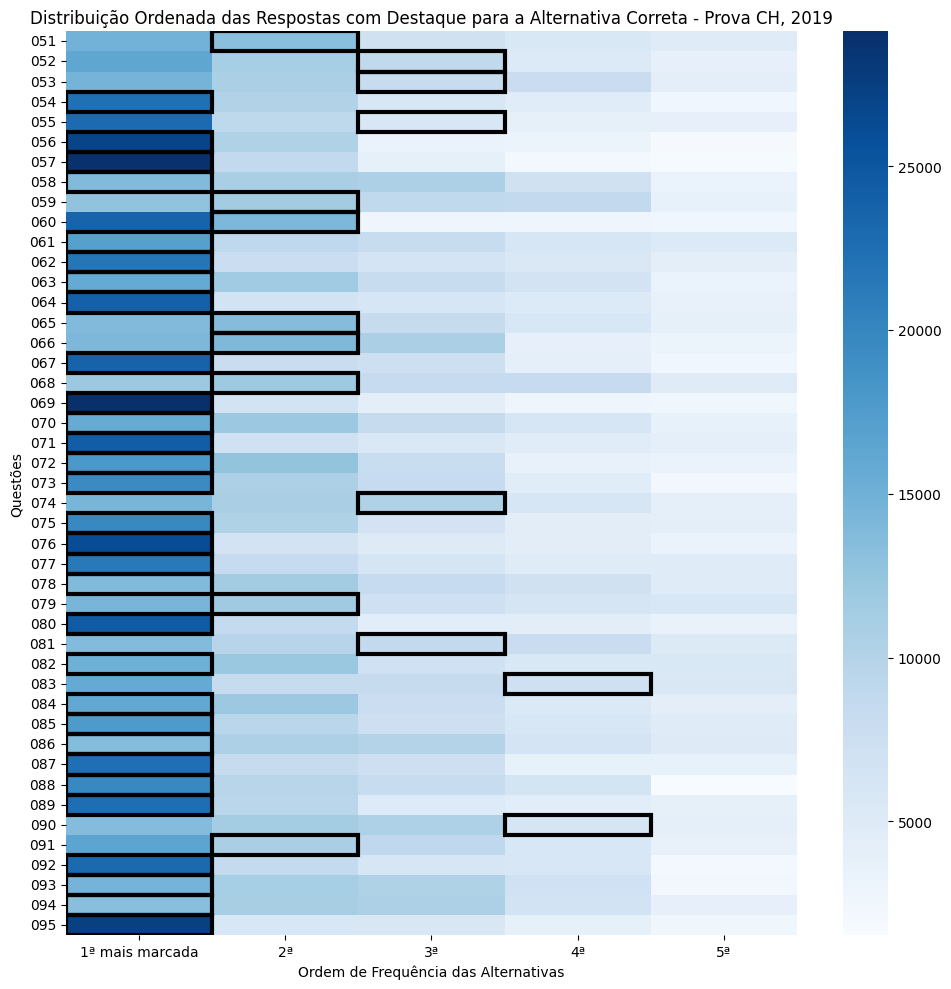

In [ ]:
# Garantir que as colunas estejam no tipo numérico
# contagem_ordenada[['1', '2', '3', '4', '5']] = contagem_ordenada[['1', '2', '3', '4', '5']].apply(pd.to_numeric, errors='coerce')

# Dados para o heatmap
heatmap_data_ord = df_2019_dia1_ch[['Alternativa_1', 'Alternativa_2', 'Alternativa_3', 'Alternativa_4', 'Alternativa_5']]

# Criar o heatmap
plt.figure(figsize=(10, 10))
ax = sns.heatmap(heatmap_data_ord, annot=False, cmap='Blues', cbar=True,
                 xticklabels=['1ª mais marcada', '2ª', '3ª', '4ª', '5ª'],
                 yticklabels=df_2019_dia1_ch['ID_QUESTAO'].str[-3:])


# Adicionar retângulo ao redor do valor da alternativa correta
for i, valor_certo in enumerate(df_2019_dia1_ch['Contagem Alternativa Certa']):
    # Verificar em qual coluna (1 a 5) o valor da resposta correta aparece
    for j in range(5):  # colunas 0 a 4
        if heatmap_data_ord.iloc[i, j] == valor_certo:
            # Adicionar retângulo
            ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, color='black', lw=3))
            break  # só marcar uma vez

plt.title('Distribuição Ordenada das Respostas com Destaque para a Alternativa Correta - Prova CH, 2019')
plt.xlabel('Ordem de Frequência das Alternativas')
plt.ylabel('Questões')
plt.tight_layout()
plt.show()

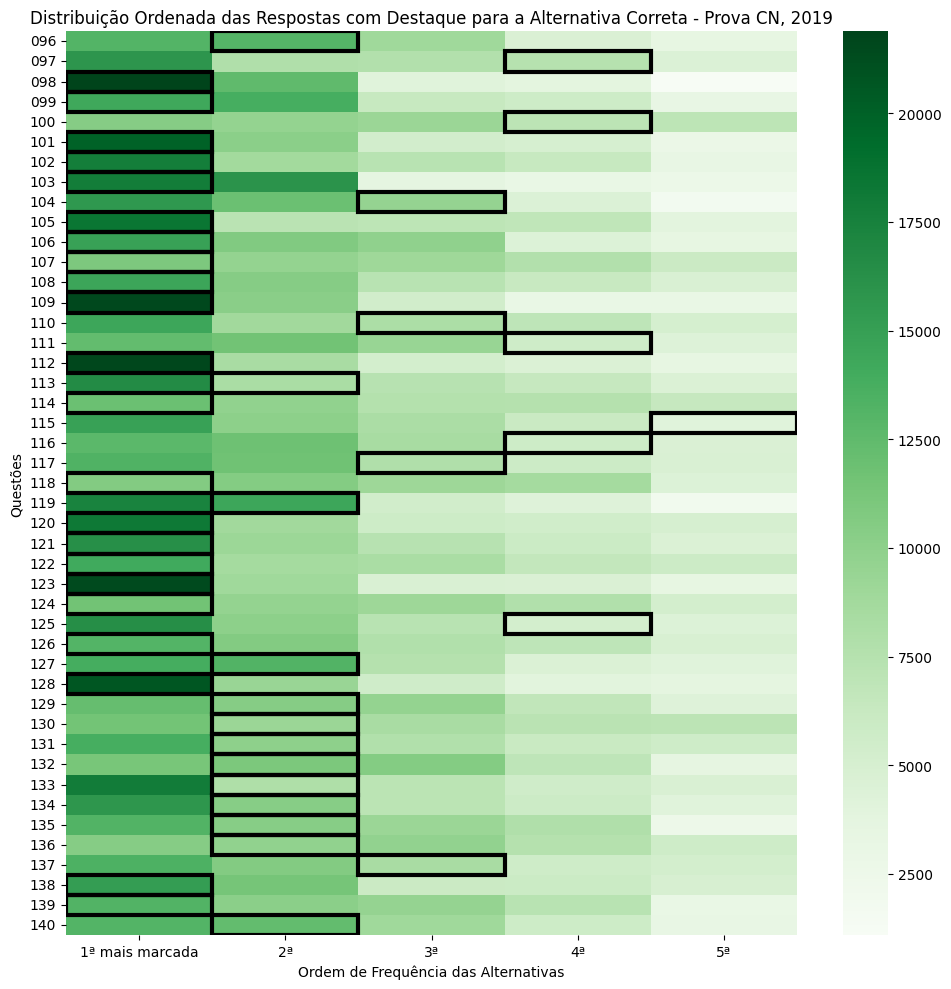

In [15]:
# Garantir que as colunas estejam no tipo numérico
# contagem_ordenada[['1', '2', '3', '4', '5']] = contagem_ordenada[['1', '2', '3', '4', '5']].apply(pd.to_numeric, errors='coerce')

# Dados para o heatmap
heatmap_data_ord = df_2019_dia2_cn[['Alternativa_1', 'Alternativa_2', 'Alternativa_3', 'Alternativa_4', 'Alternativa_5']]

# Criar o heatmap
plt.figure(figsize=(10, 10))
ax = sns.heatmap(heatmap_data_ord, annot=False, cmap='Greens', cbar=True,
                 xticklabels=['1ª mais marcada', '2ª', '3ª', '4ª', '5ª'],
                 yticklabels=df_2019_dia2_cn['ID_QUESTAO'].str[-3:])


# Adicionar retângulo ao redor do valor da alternativa correta
for i, valor_certo in enumerate(df_2019_dia2_cn['Contagem Alternativa Certa']):
    # Verificar em qual coluna (1 a 5) o valor da resposta correta aparece
    for j in range(5):  # colunas 0 a 4
        if heatmap_data_ord.iloc[i, j] == valor_certo:
            # Adicionar retângulo
            ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, color='black', lw=3))
            break  # só marcar uma vez

plt.title('Distribuição Ordenada das Respostas com Destaque para a Alternativa Correta - Prova CN, 2019')
plt.xlabel('Ordem de Frequência das Alternativas')
plt.ylabel('Questões')
plt.tight_layout()
plt.show()

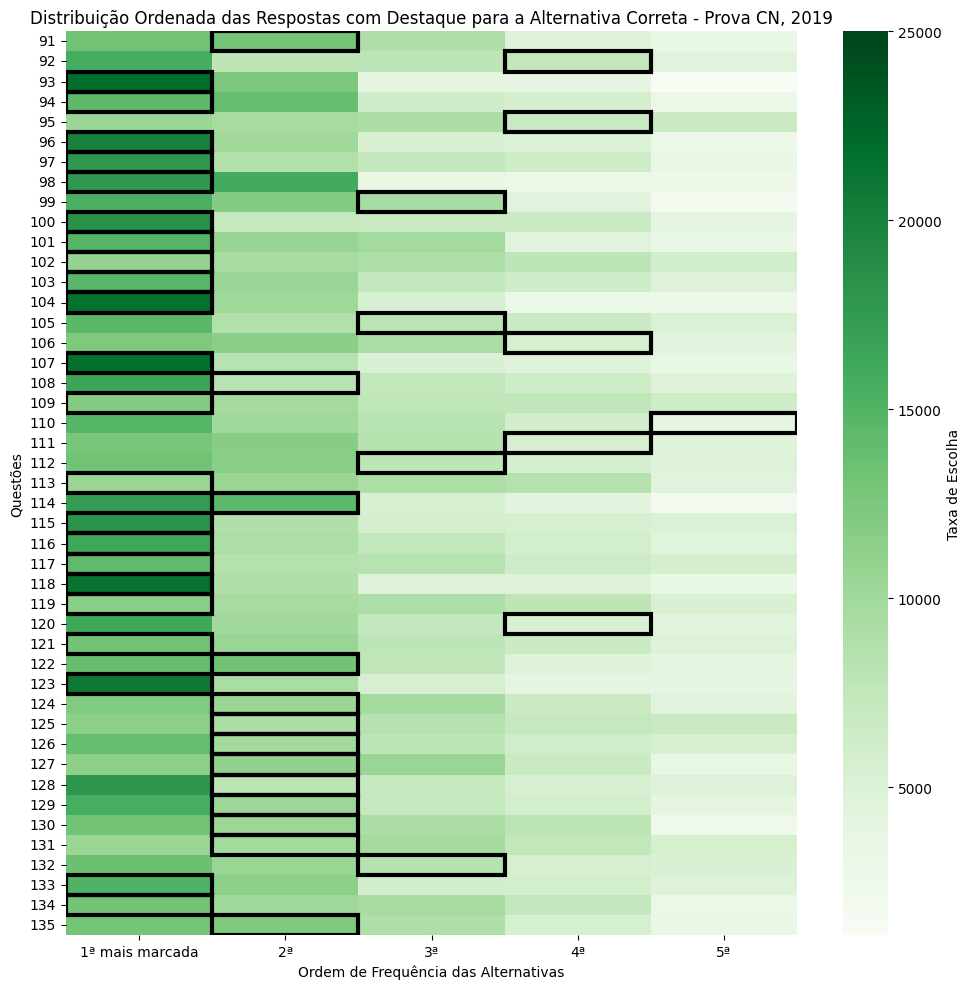

In [18]:
# Garantir que as colunas estejam no tipo numérico
# contagem_ordenada[['1', '2', '3', '4', '5']] = contagem_ordenada[['1', '2', '3', '4', '5']].apply(pd.to_numeric, errors='coerce')

# Dados para o heatmap
heatmap_data_ord = df_2019_dia2_cn[['Alternativa_1', 'Alternativa_2', 'Alternativa_3', 'Alternativa_4', 'Alternativa_5']]

# Criar o heatmap com o limite da escala ajustado para 25.000 e nome da escala como 'Taxa de Escolha'
plt.figure(figsize=(10, 10))
ax = sns.heatmap(heatmap_data_ord, annot=False, cmap='Greens', cbar=True, vmax=25000,
                 xticklabels=['1ª mais marcada', '2ª', '3ª', '4ª', '5ª'],
                 yticklabels=yticklabels_adjusted,
                 cbar_kws={'label': 'Taxa de Escolha'})  # Adiciona o nome à escala

# Adicionar retângulo ao redor do valor da alternativa correta
for i, valor_certo in enumerate(df_2019_dia2_cn['Contagem Alternativa Certa']):
    # Verificar em qual coluna (1 a 5) o valor da resposta correta aparece
    for j in range(5):  # colunas 0 a 4
        if heatmap_data_ord.iloc[i, j] == valor_certo:
            # Adicionar retângulo
            ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, color='black', lw=3))
            break  # só marcar uma vez

plt.title('Distribuição Ordenada das Respostas com Destaque para a Alternativa Correta - Prova CN, 2019')
plt.xlabel('Ordem de Frequência das Alternativas')
plt.ylabel('Questões')
plt.tight_layout()
plt.show()





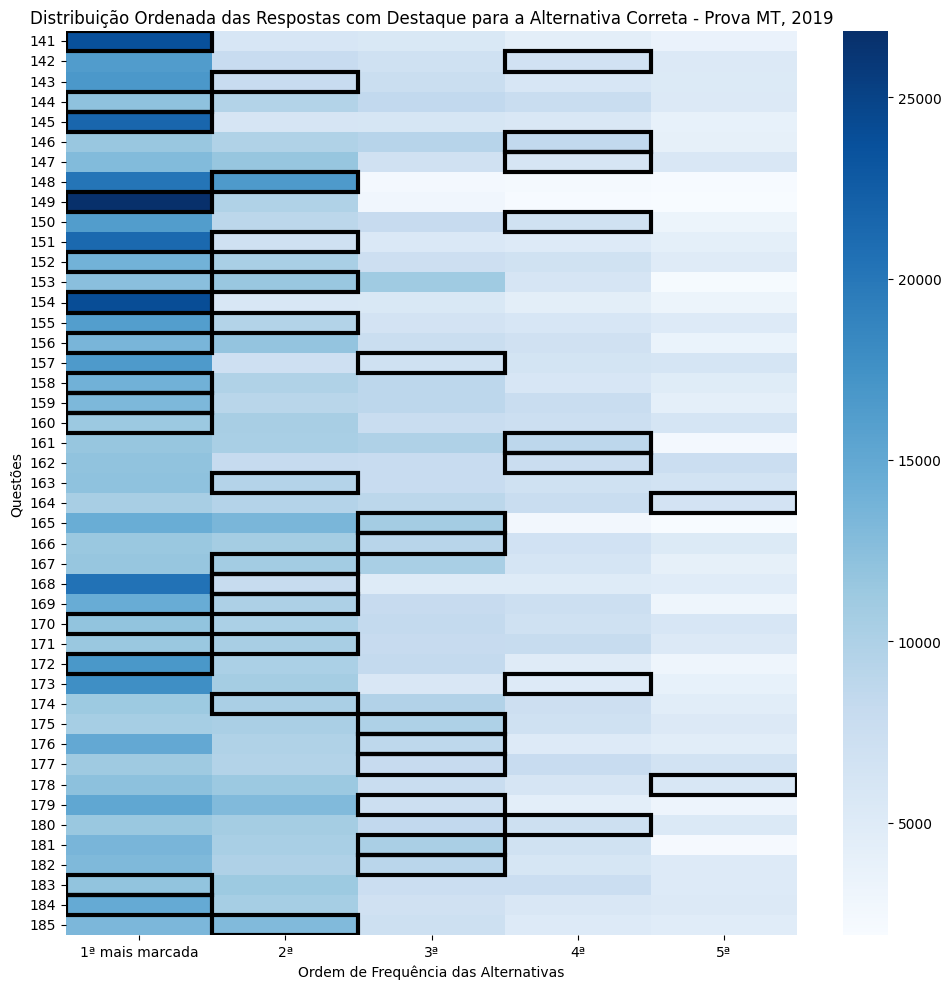

In [ ]:
# Garantir que as colunas estejam no tipo numérico
# contagem_ordenada[['1', '2', '3', '4', '5']] = contagem_ordenada[['1', '2', '3', '4', '5']].apply(pd.to_numeric, errors='coerce')

# Dados para o heatmap
heatmap_data_ord = df_2019_dia2_mt[['Alternativa_1', 'Alternativa_2', 'Alternativa_3', 'Alternativa_4', 'Alternativa_5']]

# Criar o heatmap
plt.figure(figsize=(10, 10))
ax = sns.heatmap(heatmap_data_ord, annot=False, cmap='Blues', cbar=True,
                 xticklabels=['1ª mais marcada', '2ª', '3ª', '4ª', '5ª'],
                 yticklabels=df_2019_dia2_mt['ID_QUESTAO'].str[-3:])


# Adicionar retângulo ao redor do valor da alternativa correta
for i, valor_certo in enumerate(df_2019_dia2_mt['Contagem Alternativa Certa']):
    # Verificar em qual coluna (1 a 5) o valor da resposta correta aparece
    for j in range(5):  # colunas 0 a 4
        if heatmap_data_ord.iloc[i, j] == valor_certo:
            # Adicionar retângulo
            ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, color='black', lw=3))
            break  # só marcar uma vez

plt.title('Distribuição Ordenada das Respostas com Destaque para a Alternativa Correta - Prova MT, 2019')
plt.xlabel('Ordem de Frequência das Alternativas')
plt.ylabel('Questões')
plt.tight_layout()
plt.show()

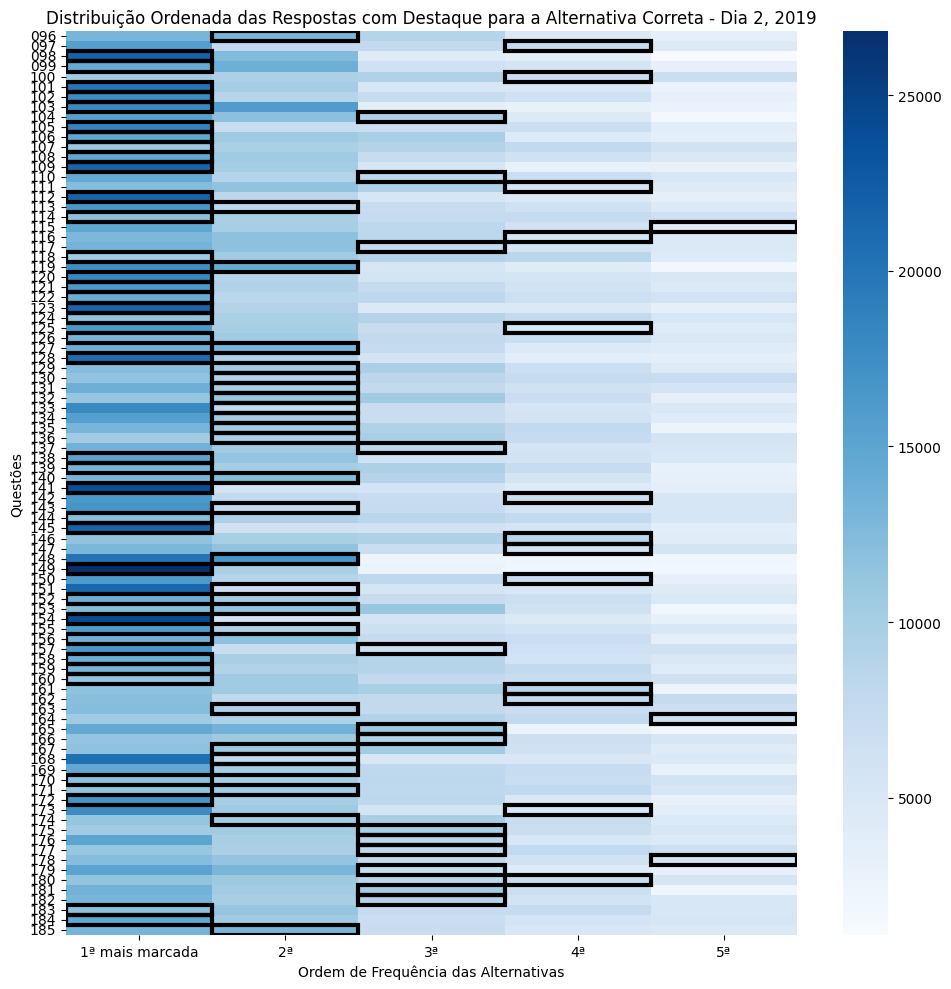

In [ ]:
# Garantir que as colunas estejam no tipo numérico
# contagem_ordenada[['1', '2', '3', '4', '5']] = contagem_ordenada[['1', '2', '3', '4', '5']].apply(pd.to_numeric, errors='coerce')

# Dados para o heatmap
heatmap_data_ord = df_2019_dia2[['Alternativa_1', 'Alternativa_2', 'Alternativa_3', 'Alternativa_4', 'Alternativa_5']]

# Criar o heatmap
plt.figure(figsize=(10, 10))
ax = sns.heatmap(heatmap_data_ord, annot=False, cmap='Blues', cbar=True,
                 xticklabels=['1ª mais marcada', '2ª', '3ª', '4ª', '5ª'],
                 yticklabels=df_2019_dia2['ID_QUESTAO'].str[-3:])


# Adicionar retângulo ao redor do valor da alternativa correta
for i, valor_certo in enumerate(df_2019_dia2['Contagem Alternativa Certa']):
    # Verificar em qual coluna (1 a 5) o valor da resposta correta aparece
    for j in range(5):  # colunas 0 a 4
        if heatmap_data_ord.iloc[i, j] == valor_certo:
            # Adicionar retângulo
            ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, color='black', lw=3))
            break  # só marcar uma vez

plt.title('Distribuição Ordenada das Respostas com Destaque para a Alternativa Correta - Dia 2, 2019')
plt.xlabel('Ordem de Frequência das Alternativas')
plt.ylabel('Questões')
plt.tight_layout()
plt.show()